<a href="https://colab.research.google.com/github/databyhuseyn/MachineLearning/blob/main/Classification_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 1

In [ ]:
import pandas as pd
import numpy as np

there's structed and unstructed data!

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame = False)       # --> dataFrame olmasin deye "as_frame = False" yaziriq

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
print(mnist.DESCR)

In [ ]:
mnist.keys()

In [ ]:
X, y = mnist['data'], mnist['target']
X[0]

In [ ]:
X.shape       # --> 70k shekil, her shekil 784 pixel(yaxud da arrayin ichindeki value-lar)

datani vizuallashdiraq

In [ ]:
import matplotlib.pyplot as plt

def digit_image(num_image):
  num_image_reshaped = num_image.reshape(28, 28)
  plt.imshow(num_image_reshaped, cmap = 'binary')                   # --> metrics'den shekil fofrmatina qaytarmaq uchun .imshow()         cmap = 'binary'  olanda ag/gara olur
  plt.axis('off')

some_digit = X[0]
digit_image(some_digit)

In [ ]:
y[0]

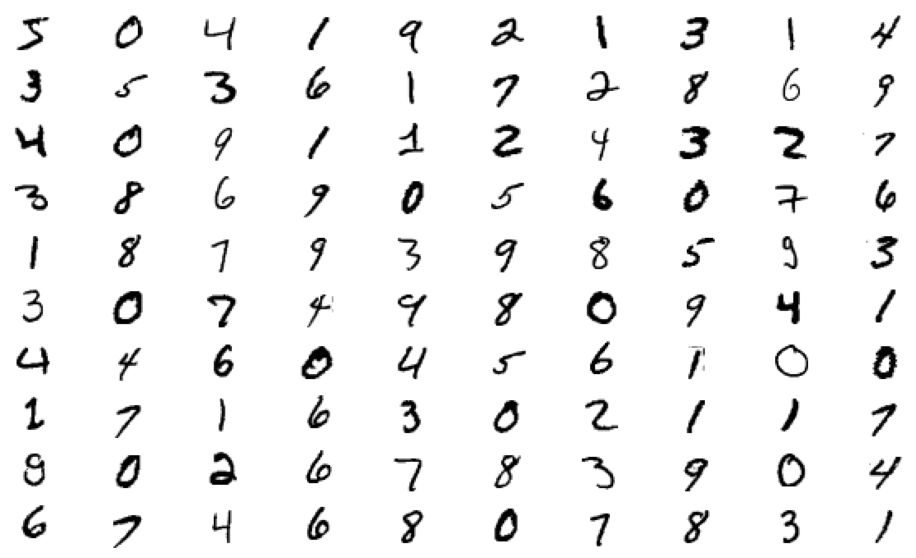

In [ ]:
plt.figure(figsize= (12,7))
for idx, image in enumerate(X[:100]):       #--> 0-dan 100-e kimi butun shekilleri vizuallashdir
  plt.subplot(10,10, idx+1)                 # idx+1 yeni indexin uzerine bir gel ve hemin yere qoy shekli
  digit_image(image)

In [ ]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [ ]:
y_train_5 = (y_train == '5')
y_test_5 =(y_test == '5')

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
sgd_clf = SGDClassifier(random_state=42)

In [ ]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3)

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
sgd_clf.score(X_test, y_test_5)

0.9492

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))          # --> any baxir ki gorek burda True varmi hech.

False


**recall score and precision score is more important than accuracy**

In [ ]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3)

array([0.90965, 0.90965, 0.90965])

f1_score --> recall ve precisionun ortalamasidir.  --> tibbde recall and f1 score is important

In [ ]:
from sklearn.model_selection import cross_val_predict

preds = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)
preds

array([ True, False, False, ...,  True, False, False])

In [ ]:
from sklearn.metrics import confusion_matrix      # --> oz tapdigi ile real olani muqayise edir. TP, FP, FN, TN

cm = confusion_matrix(y_train_5, preds)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
precision_score(y_train_5, preds) * 100

83.70879772350011

In [ ]:
recall_score(y_train_5, preds) * 100

65.11713705958311

In [ ]:
f1_score(y_train_5, preds) * 100

73.25171197343846

trade off

# PART 2

tradeoff, tresholds and etc.

baxmaq isteyirikse ki model oz texmininden ne qeder emindi, o zaman .decision_function

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [ ]:
treshold = 0
y_some_digit_pred = (y_scores > treshold)
y_some_digit_pred

array([ True])

cross val predict butun data uzerinde texmin edir

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,cv=3, method = 'decision_function')       # --> decision function yaziriq ki True/False yerine ne qeder emin olub olmadigini yazsin
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

tradeoff da precision ve recall in bir biri ile elaqesini gormek isteyirik

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, tresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
tresholds

array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
         38871.26391927,   42216.05562787,   49441.43765905])

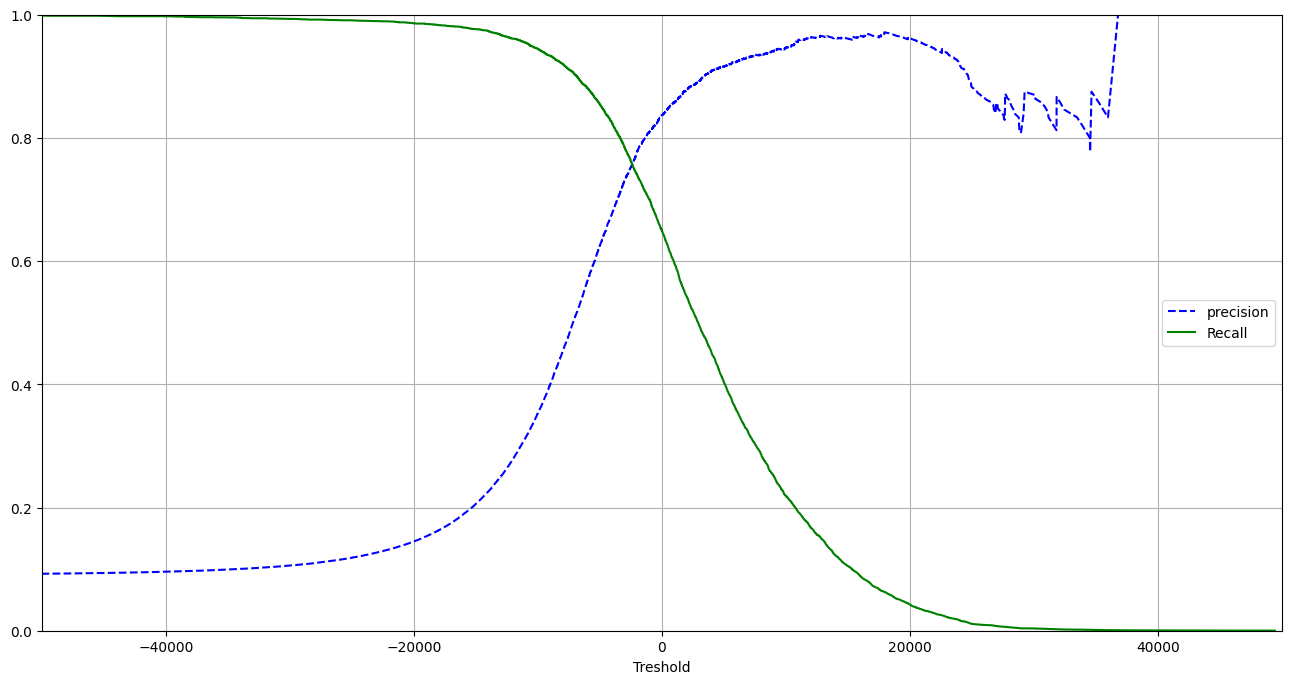

In [ ]:
plt.figure(figsize = (16, 8))
plt.plot(tresholds, precisions[:-1], 'b--', label = "precision")
plt.plot(tresholds, recalls[:-1], 'g-', label = 'Recall')

plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel('Treshold')
plt.legend(loc = 'center right');

choose point for 90% of precision

In [ ]:
idx_for_90_precision = (precisions > 0.90).argmax()       # argmax --> max qiymetin indeksini qaytarir      argmax()  --> birinci True nu qaytaracaq "precision > 0.90" muqayisesinden
treshold_for_90_precision = tresholds[idx_for_90_precision]
treshold_for_90_precision

3370.0194991439557

novbeti 2 kod experimentaldir

In [ ]:
idx_for_equal_precision = (precisions == recalls).argmax()          # --> ikisinin kesinshmesini tapdiq
tresholds_for_equals = tresholds[idx_for_equal_precision]
tresholds_for_equals

-2379.064500932274

In [ ]:
precisions[idx_for_equal_precision], recalls[idx_for_equal_precision]           # --> ikisinin keshismesinde ne qederdi valuelar

(0.7572403615569083, 0.7572403615569083)

In [ ]:
y_train_pred_90 = (y_scores >= treshold_for_90_precision)               # burada biz precision 90%-den cox olsun isteyirik deye bayaqki tapdigimiz o 90% lik treshold-dan onun texminlerinin 90%den chox olmasini sorushuruq
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [ ]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [ ]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

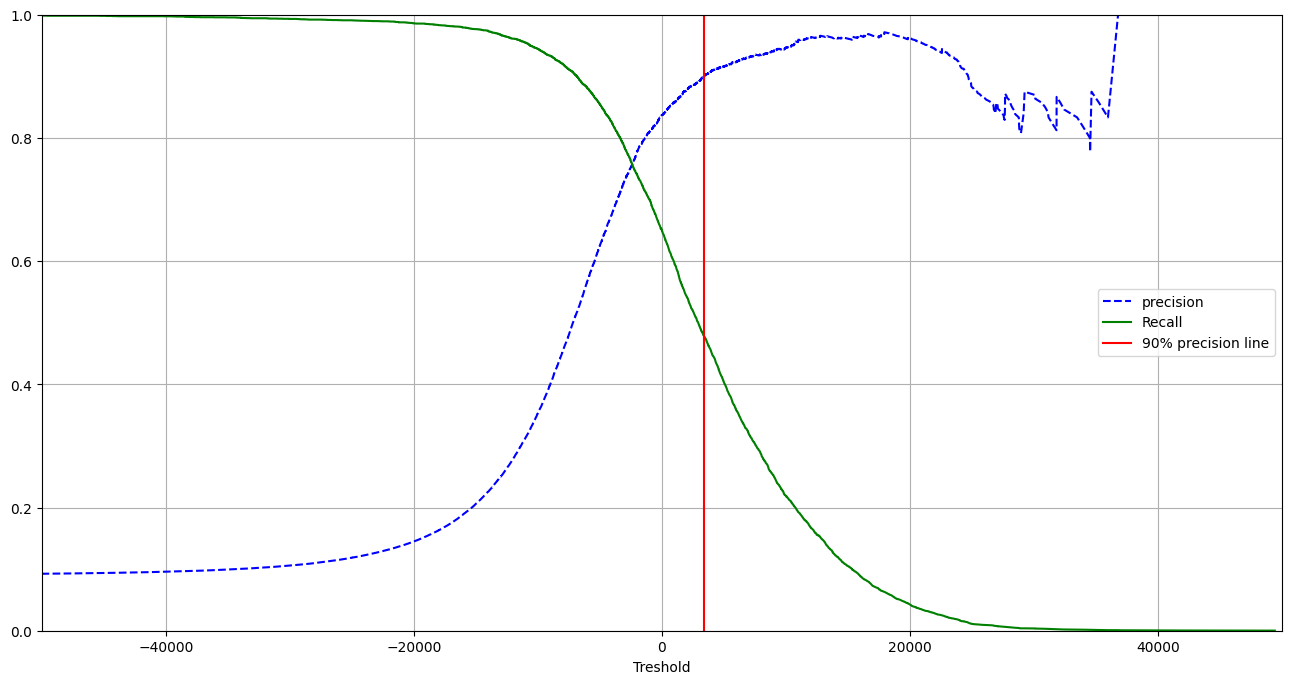

In [ ]:
plt.figure(figsize = (16, 8))
plt.plot(tresholds, precisions[:-1], 'b--', label = "precision")
plt.plot(tresholds, recalls[:-1], 'g-', label = 'Recall')

plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel('Treshold')
plt.axvline(x = treshold_for_90_precision, ymin=0, ymax=1, color = 'r', label = '90% precision line')
plt.legend(loc = 'center right');

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, tresholds = roc_curve(y_train_5, y_scores)

recall ne qeder sola yaxin olsa o qeder yaxsidi

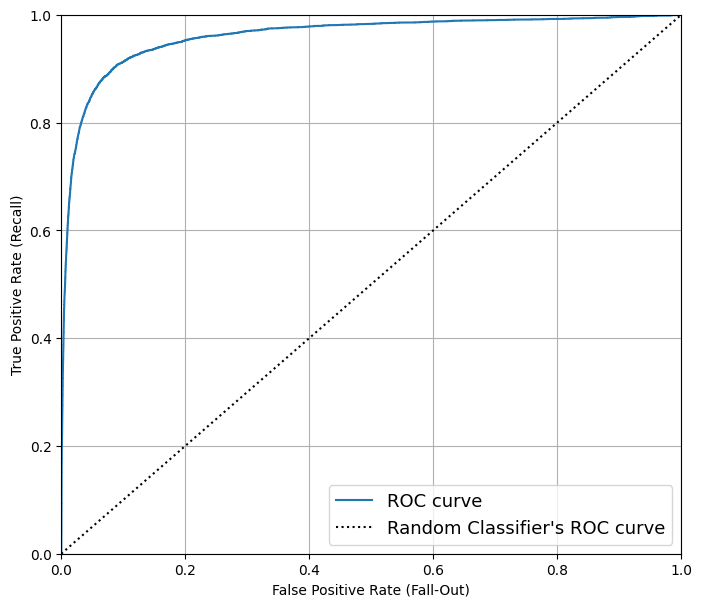

In [ ]:
plt.figure(figsize=(8, 7))
plt.plot(fpr, tpr, label = 'ROC curve')
plt.plot([0,1],[0,1], 'k:', label ="Random Classifier's ROC curve")


plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc='lower right', fontsize=13);

In [ ]:
pd.value_counts(y)

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
dtype: int64

In [ ]:
from sklearn.metrics import roc_auc_score     # area under cover --> auc

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method = 'predict_proba')       # faiz gosterir (solda deyil, sagda odur kimi gosterir)


In [ ]:
y_probas_forest[:2] # --> ilk 2 texminini gosterir

array([[0.11, 0.89],
       [0.99, 0.01]])

In [ ]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, tresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

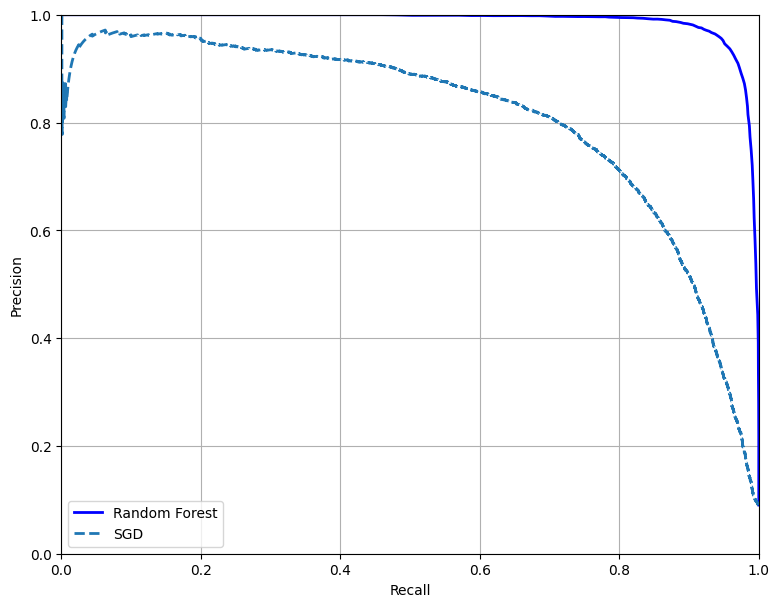

In [ ]:
plt.figure(figsize=(9, 7))

plt.plot(recalls_forest, precisions_forest, 'b-', linewidth=2,
         label='Random Forest')
plt.plot(recalls, precisions, '--', linewidth=2, label='SGD')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc='lower left');

In [ ]:
y_train_pred_forest = y_probas_forest[:,1] >= 0.5
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [ ]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

# MultiClass Classification

OvA or OvR --> One versus all or One versus rest   ; en yaxshi skoru goturur

OvO --> One versus One ✈ hamisini bir biri ile muqayise edir ve her biri uchun bir binary classification duzeldir

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(random_state = 42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [ ]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [ ]:
class_id = some_digit_scores.argmax()
class_id

5

In [ ]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
svm_clf.classes_[class_id]

'5'

In [ ]:
svm_clf.decision_function_shape = 'ovo'
some_digit_scores_ovo = svm_clf.decision_function([some_digit])
some_digit_scores_ovo.round(2)

array([[ 0.11, -0.21, -0.97,  0.51, -1.01,  0.19,  0.09, -0.31, -0.04,
        -0.45, -1.28,  0.25, -1.01, -0.13, -0.32, -0.9 , -0.36, -0.93,
         0.79, -1.  ,  0.45,  0.24, -0.24,  0.25,  1.54, -0.77,  1.11,
         1.13,  1.04,  1.2 , -1.42, -0.53, -0.45, -0.99, -0.95,  1.21,
         1.  ,  1.  ,  1.08, -0.02, -0.67, -0.14, -0.3 , -0.13,  0.25]])

eynisi altindadi, sadece yxuarida one versus one di, asagidaki one versus rest

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state = 42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [ ]:
len(ovr_clf.estimators_)

10

In [ ]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])             # -->  hansi ki sehv cavab verir

array(['3'], dtype='<U1')

sgd classifier pixelleri bir birine vurdugundan bu ish uchun chox da mukemmel deyil

In [ ]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype('float64'))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring = 'accuracy')         # qara #000000 ag #ffffff buna gore de scaling edende aradaki mesafe azalir deye daha duzgun cavab verir

array([0.8983, 0.891 , 0.9018])

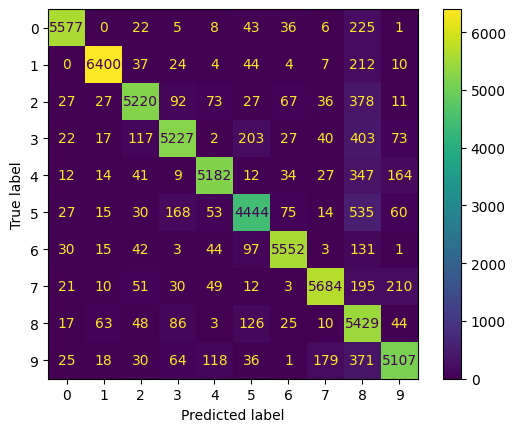

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

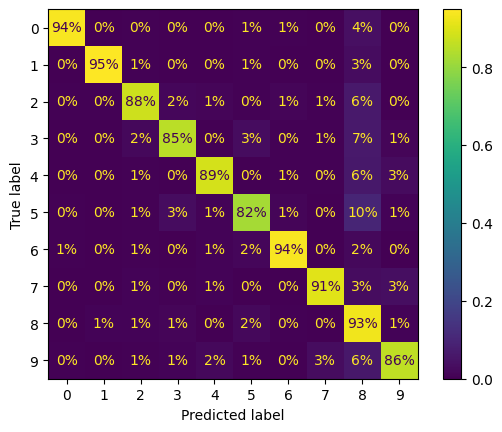

In [ ]:
plt.rc('font', size = 10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize='true', values_format='.0%')
plt.show()

how to find biggest errors models made

#  Multilabel Classification

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)           # iki label yaratdiq
y_multilabel = np.c_[y_train_large, y_train_odd]          # np.c_  --> bu labelleri birleshdirdik

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')       # --> makro onu deyir ki, hamisi uchun f1 score u tapir, sonra sayina baxmadan birleshdirir

0.976410265560605

# MultiOutput Classification

In [ ]:
import random
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

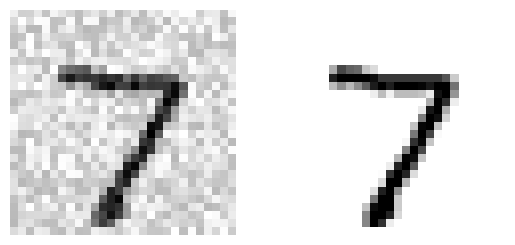

In [ ]:
plt.subplot(121);
digit_image(X_test_mod[0])
plt.subplot(122);
digit_image(y_test_mod[0])
plt.show()

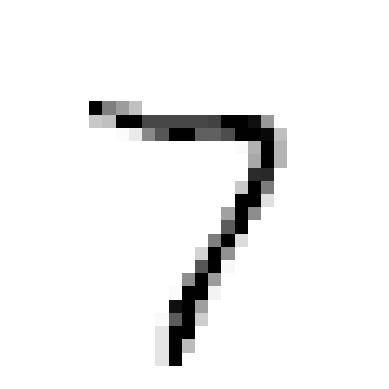

In [ ]:
knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train_mod, y_train_mod)
cleaned_pic = knn_clf.predict([X_test_mod[0]])

digit_image(cleaned_pic)

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
baseline_accuracy = knn_clf.score(X_test, y_test)
baseline_accuracy

0.9688

# Tasks

ML Classification Taks

1 Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors' : [3, 4, 5, 7],
    'weights' : ['uniform', 'distance']
}

knn_clf = KNeighborsClassifier()


grid_search = GridSearchCV(knn_clf, param_grid, cv=3)
grid_search.fit(X_train[:10000], y_train[:10000])

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 7],
                         'weights': ['uniform', 'distance']})

In [ ]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [ ]:
grid_search.best_score_

0.9397994088551026

In [ ]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
grid_search.best_estimator_.fit(X_train, y_train)
turned_accuracy = grid_search.score(X_test, y_test)
turned_accuracy

0.9714

Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel.6 Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.

In [ ]:
from scipy.ndimage import shift

In [ ]:
def shift_image(image, dx, dy):
  image = image.reshape((28,28))
  shifted_image = shift(image, [dx, dy], cval=0, mode="constant")
  return shifted_image.reshape([-1])

In [ ]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((-1, 0), (1, 0), (0, 1), (0, -1)):
  for image, label in zip(X_train, y_train):
    X_train_augmented.append(shift_image(image, dx, dy))
    y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [ ]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [ ]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [ ]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
knn_clf.score(X_test, y_test)